### Correlation analysis
상관관계를 측정하는 방식에는 여러 방식이 있다.

1. 데이터의 유형에 따라 범주형과 연속형의 차이
2. 상관관계 정도를 표현하는 데 있어 +부터 -까지의 범위와
3. 상관관계의 수준에 따라 범위의 차이가 존재

### 피어슨 상관계수(correlation coefficient)
피어슨 상관계수는 두 변수가 모두 연속된 값일 때 적용하는 방식이다.

다음과 같은 연구 문제가 상관계수 분석에 적합한 의문점이다.
- 학교와의 거리가 멀수록 성적이 낮아질까?
- 소득수준이 높을수록 비만율이 낮을까?
- 인터넷 사용량이 높을수록 행복도는 떨어질까?

중요한 점으로는, 위와 같은 적합한 형태라고 하더라도 순위/등급은 피어슨 상관계수를 적용하기엔 적합하지 않다. 이는 스피어먼의 Rho와 깊은 관계가 있다.

### 데이터셋 탐색

In [1]:
import pandas as pd

sales = pd.read_csv("./Data/sales.csv")
sales.head()

,Commercial,Sales
0,64.2,154.1
1,77.7,217.6
2,77.8,178.9
3,103.3,309.9
4,103.9,207.8


In [3]:
sales.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Commercial,100.000000,81.786000,19.195196,39.800000,66.250000,83.450000,95.825000,126.100000
Sales,100.000000,207.356000,55.886746,99.500000,165.325000,201.700000,245.825000,346.800000


### 데이터의 분포와 시각화


<Axes: xlabel='Commercial', ylabel='Sales'>

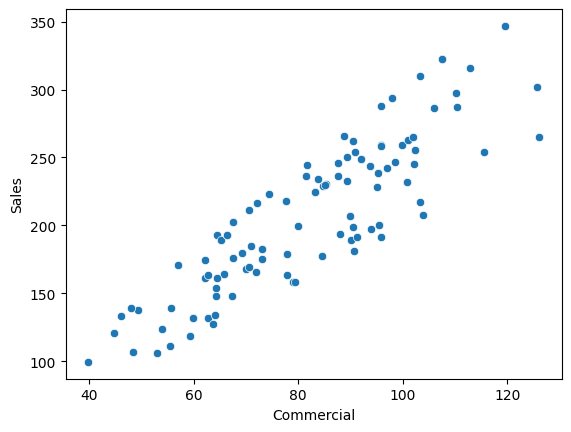

In [4]:
import seaborn as sns

sns.scatterplot(data=sales, x="Commercial", y='Sales')

양의 상관관계를 가지는 모습을 확인할 수 있다. 이제 이런 관계가 통계적으로 유의한 수준인지 검정한다.

### 통계 분석과 정규성 검정
피어슨 상관계수의 경우 통계 검정의 조건은
1. 각 변수가 연속형일 것
2. 정규분포를 이룰 것

두 변수가 정규분포인지 확인하기 위해서는 샤피로-윌크 검정을 이용한다.

In [5]:
import pingouin as pg

pg.normality(sales["Commercial"]).round(3)

,W,pval,normal
Commercial,0.986,0.376,True


In [6]:
pg.normality(sales["Sales"]).round(3)

,W,pval,normal
Sales,0.986,0.351,True


두 컬럼 모두 p-value가 0.05 이상이므로 정규분포를 이루고 있다. 이제 상관관계 분석을 수행할 수 있다.

In [7]:
pg.corr(sales["Sales"], sales["Commercial"]).round(3)

,n,r,CI95%,p-val,BF10,power
pearson,100,0.876,"[0.82, 0.91]",0.0,2.752e+29,1.0


검정 결과에 따라 p-value가 0.05보다 작기 때문에 귀무가설을 기각하고 대립가설(서로 상관관계가 존재한다.)을 채택한다.

r에 해당하는 부분이 상관계수인데, 0.876으로 조금은 높은 수준이다.

### 서열형 변수의 상관관계 분석
서열형 변수는 말 그대로 "순서"를 기록한 숫자라고 볼 수 있다. 예를 들면 10대에서 20대까지를 1, 30대부터 40대까지를 2 등으로 나누는 행위를 말한다.

이렇게 나눌 경우 연속형 변수와 비교하여 자료의 해상도가 떨어질 수 있지만, 큰 범위의 값을 축소된 범위 단위로 요약해서 확인할 수 있는 장점을 갖게된다.

In [8]:
times = pd.read_csv("./Data/times.csv")
times.head()

,Income,Hobby
0,4,3
1,5,4
2,1,1
3,2,2
4,5,5


소득 수준이나, 취미 시간의 경우 모두 등급으로 나눠져 있어 연속형으로 보기 쉽지만 실제로는 "서로 나눠진 수준"을 갖고 있다.

In [9]:
times.describe()

,Income,Hobby
count,200.000000,200.000000
mean,3.240000,3.040000
std,1.477605,1.294907
min,1.000000,1.000000
25%,2.000000,2.000000
50%,3.500000,3.000000
75%,5.000000,4.000000
max,5.000000,5.000000


사실 등급에 3.24 등급이라거나, 3.04등급은 없다. 따라서 이런 형상의 데이터는 `value_counts()`를 활용한다.

In [11]:
times["Income"].value_counts()

Income
5    56
4    44
2    38
1    35
3    27
Name: count, dtype: int64

In [12]:
times["Hobby"].value_counts()

Hobby
3    67
5    36
2    34
4    32
1    31
Name: count, dtype: int64

<Axes: xlabel='Income', ylabel='Hobby'>

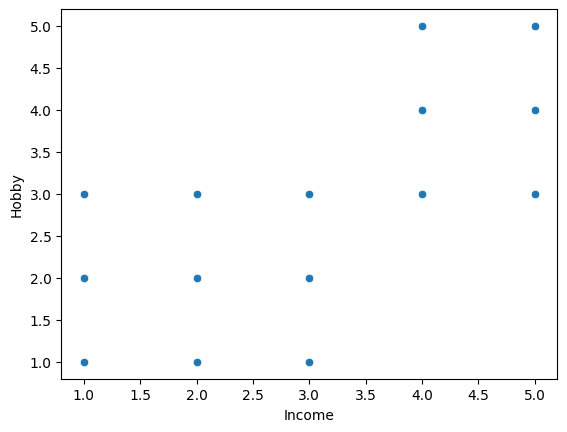

In [16]:
sns.scatterplot(x = "Income", y="Hobby", data=times)

산포도는 일정한 경향성을 보여주지만, 연속형 변수처럼 각각의 특성을 해석하기 어렵다. 각 값이 실제 값이 아닌 등급을 포함하고 있기 때문이다.

그렇기에, 등급별 데이터의 경우 히스토그램 등 유저가 원하는 방향의 추가적 해석을 수행할 필요가 있다.


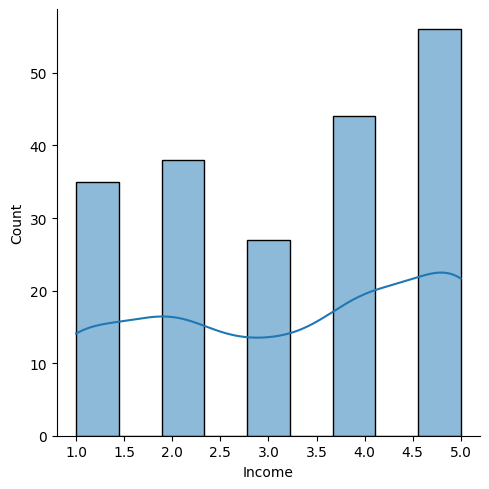

In [17]:
sns.displot(times["Income"], kde=True)

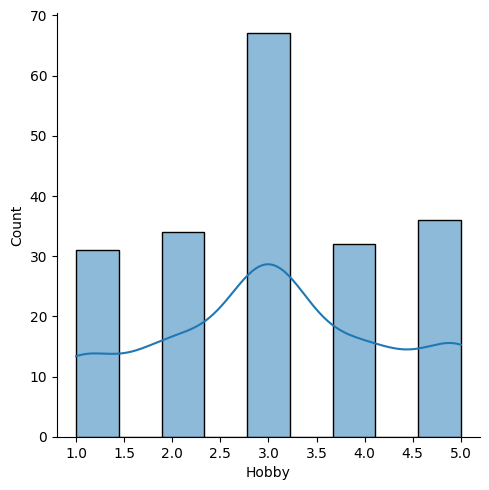

In [18]:
sns.displot(times["Hobby"], kde=True)

### 비모수 검정의 조건
모수 검정은 기본적으로 데이터가 "특정 조건(ex. 정규분포)"등을 만족해야 사용할 수 있는 분석이다. 반대로, 비모수 검정은 "등급 데이터"와 같이 연속되지 않은 데이터에서의 검정에서 사용할 수 있다.

이 경우, 요구 조건이 사라지게 된다. 이러한 부분은 장점이라고 생각할 수 있겠지만, 강력한 통계 검정력을 얻기 어렵다는 단점이 있다.

### 스피어만의 $\rho$와 켄달의 $\tau$
데이터에 대한 관점의 차이로 서열형 변수의 상관관계에는 두 가지 방식을 같이 사용하는 경우가 일반적이다.

두 검정 방식을 모두 사용한다.

In [19]:
pg.corr(times["Income"], times["Hobby"], method="spearman")

,n,r,CI95%,p-val,power
spearman,200,0.71138,"[0.64, 0.77]",3.736196e-32,1.0


In [20]:
pg.corr(times["Income"], times["Hobby"], method="kendall")

,n,r,CI95%,p-val,power
kendall,200,0.578509,"[0.48, 0.66]",5.588975e-24,1.0


두 검정 모두 p-value가 0.05보다 작기 때문에 검정 값이 유의하다고 할 수 있다.